# Problema 2

In [1]:
import numpy as np # for numerical computing
import matplotlib.pyplot as plt # for plotting functions
from matplotlib import cm # colormap for color palette
from scipy.special import erfc

In [2]:
def qam_awgn(M,gamma_s):
    if (M==1) or (np.mod(np.log2(M),2)!=0): # M not a even power of 2
        raise ValueError('Only square MQAM supported. M must be even power of 2')
    SERs = 1-(1-(1-1/np.sqrt(M))*erfc(np.sqrt(3/2*gamma_s/(M-1))))**2
    return SERs

(1e-06, np.float64(3.7448953948482724))

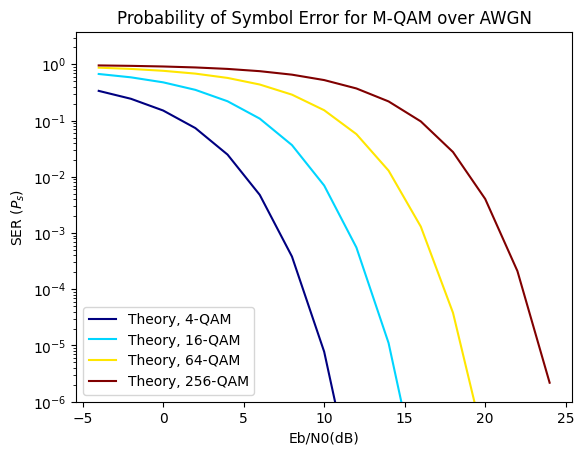

In [3]:
#---------Input Fields------------------------
EbN0dBs = np.arange(start=-4,stop = 26, step = 2) # Eb/N0 range in dB for simulation
mod_type = 'QAM'
arrayOfM=[4,16,64,256] 

colors = plt.cm.jet(np.linspace(0,1,len(arrayOfM))) # colormap
fig, ax = plt.subplots(nrows=1,ncols = 1)

for i, M in enumerate(arrayOfM):
    k=np.log2(M)
    EsN0dBs = 10*np.log10(k)+EbN0dBs # EsN0dB calculation
    gamma_s = np.log2(M)*(10**(EbN0dBs/10))
    SER_theory = qam_awgn(M,gamma_s) #theory SER
    ax.semilogy(EbN0dBs,SER_theory,color = colors[i],linestyle='-',label='Theory, '+str(M)+'-'+mod_type.upper())

ax.set_xlabel('Eb/N0(dB)')
ax.set_ylabel('SER ($P_s$)')
ax.set_title('Probability of Symbol Error for M-'+str(mod_type)+' over AWGN')
ax.legend()
ax.set_ylim(1e-6)

Abusei do fato que só é pedido que façamos a SER teórica :] e ficou consideravelmente mais rápido e fácil de adaptar o código para essa funcionalidade. 